In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense

In [3]:
df = pd.read_csv("../datasets/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
features = df.drop(["Time","Class","Amount"], axis=1)
target = df["Class"]

In [ ]:
np.sum(target == 1) #total anomalies in dataset

492

In [7]:
features.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


In [8]:
ss = StandardScaler()
features_scaled = ss.fit_transform(features)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2)

In [10]:
encoder = Sequential([
    Dense(64, activation="relu", input_shape=(x_train.shape[1],)),
    Dense(32, activation="relu"),
    Dense(16, activation="relu")
])

decoder = Sequential([
    Dense(32, activation="relu"),
    Dense(64, activation="relu"),
    Dense(x_train.shape[1], activation="linear")
])

model = Sequential([
    encoder,
    decoder
])

c:\Users\dsb71\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(loss="mse", optimizer='adam')
H = model.fit(x_train, x_train, validation_data=(x_test, x_test), epochs=10, batch_size=30)

Epoch 1/10
7595/7595 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 0.3881 - val_loss: 0.1076
Epoch 2/10
7595/7595 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0954 - val_loss: 0.0652
Epoch 3/10
7595/7595 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0815 - val_loss: 0.0582
Epoch 4/10
7595/7595 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.0596 - val_loss: 0.0465
Epoch 5/10
7595/7595 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.0526 - val_loss: 0.0385
Epoch 6/10
7595/7595 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.0458 - val_loss: 0.0422
Epoch 7/10
7595/7595 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0443 - val_loss: 0.0346
Epoch 8/10
7595/7595 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.0449 - val_loss: 0.0304
Epoch 9/10
7595/7595 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.0388 - val_loss: 0.0328
Epoch 10/10
7595/7595 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 0.0386 - val_loss: 0.0293


In [21]:
predictions = model.predict(x_test)
reconstruction_error = np.mean(np.power(x_test - predictions, 2), axis=1)
threshold = np.percentile(reconstruction_error, 99.6)
anomalies = reconstruction_error > threshold

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [23]:
print(np.sum(anomalies))

228


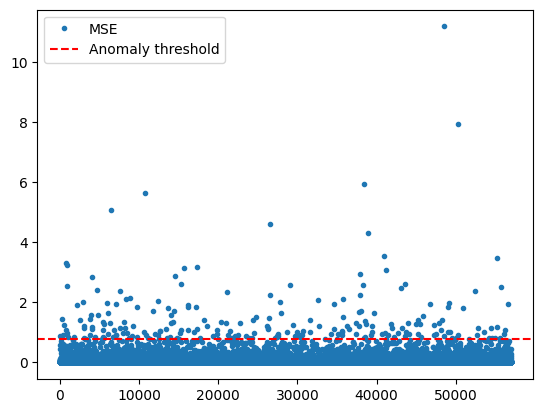

In [ ]:
plt.plot(reconstruction_error, linestyle=" ", marker="o", markersize=3)
plt.axhline(threshold, color="r", linestyle="--")
plt.legend(["MSE", "Anomaly threshold"])